We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-14 13:55:35--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.117, 13.227.223.78, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795388 (777K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 776.75K  --.-KB/s    in 0.05s   

2020-05-14 13:55:35 (14.2 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [795388/795388]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [4]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [5]:
df.count()

dateRep                    16949
day                        16949
month                      16949
year                       16949
cases                      16949
deaths                     16949
countriesAndTerritories    16949
geoId                      16949
countryterritoryCode       16949
popData2018                16949
continentExp               16949
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   
2020-05-14   2.0  725.0  259.0  0.0  0.0   4.0  180.0  0.0  316.0  54.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-14     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[136 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('183 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... pdeaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...      VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...     ...  ..  ..   
2020-11-09   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-13   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   

                                        
geoId       VI  VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-11-09 NaN NaN NaN NaN NaN NaN NaN  
2020-11-10 NaN NaN NaN NaN NaN NaN NaN  
2020-11-11 NaN NaN NaN NaN NaN NaN NaN  
2020-11-12 NaN NaN NaN NaN NaN NaN NaN  
2020-11-13 NaN NaN NaN NaN NaN NaN NaN  

[319 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    319.000000
mean     523.000000
std       92.231593
min      364.000000
25%      443.500000
50%      523.000000
75%      602.500000
max      682.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak usually fits a gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. Before fitting we have to find out how far a country has come along the curve. We use the residuals of a fit along the double logarithm, which should approach a straight line.

In [9]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'daynum':df_geo['daynum'], measure:df_geo[measure][country]})

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [10]:
mincases = df[df['geoId'] == country]['popData2018'].iloc[0] / 1e6
maxcases = df_pred[measure].cumsum().max()

From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the gumbel distribution, which is cumulative.

In [11]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that progress, returning the residuals as a measure of fit quality.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least larger than 4 measures, to prevent spurious fits. (Such as fitting on just two measures, which would be perfect but not relevant.)

In [17]:
def calcresd(progress):
    global df_pred, fit
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        print('Progress %1.9f gives %2.9f' %(progress[0], fit[1][0]))
        return(fit[1][0])
    else:
        return 99

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use a least squares method that searches from 1 to any number between 0.1 and 1. If a country is at less than 10% of progress the numbers will not likely produce a relevant curve.

In [18]:
from scipy.optimize import minimize

optim = minimize(calcresd, 1, method='SLSQP', bounds=[(0.1, 1)])

Progress 1.000000000 gives 19.394800175
Progress 1.000000000 gives 19.394800175
Progress 1.000000015 gives 19.394919524
Progress 0.100203271 gives 1.172806914
Progress 0.548961207 gives 1.621526040
Progress 0.773365585 gives 0.930114896
Progress 0.885518251 gives 0.234644859
Progress 0.941537486 gives 0.243976906
Progress 0.969522233 gives 1.236750306
Progress 0.983536467 gives 3.034138552
Progress 0.983536467 gives 3.034138552
Progress 0.983536482 gives 3.034141702
Progress 0.983090237 gives 2.941645433
Progress 0.983090237 gives 2.941645433
Progress 0.983090252 gives 2.941648462
Progress 0.980944466 gives 2.542833708
Progress 0.980944466 gives 2.542833708
Progress 0.980944481 gives 2.542836238
Progress 0.971980473 gives 1.436993337
Progress 0.971980473 gives 1.436993337
Progress 0.971980487 gives 1.436994653
Progress 0.962277558 gives 0.800887110
Progress 0.962277558 gives 0.800887110
Progress 0.962277573 gives 0.800887819
Progress 0.950925167 gives 0.411199957
Progress 0.950925167 g

The optimization gives detailed results, such as the best result in `fun`, the number of fitted measures in `nfev` and the optimal input in `x[0]`. That number is the actual progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases.

In [19]:
progress = optim.x[0]
print(optim)

     fun: 0.12224324861858293
     jac: array([0.00054267])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.91848624])


The `scaled` column contains the scaled cumulative distribution that should look like a gumbel cumulative distribution.

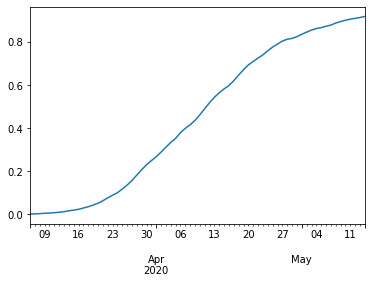

In [20]:
df_pred['scaled'].plot()

The `linear` column contains the line that we try to fit. We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

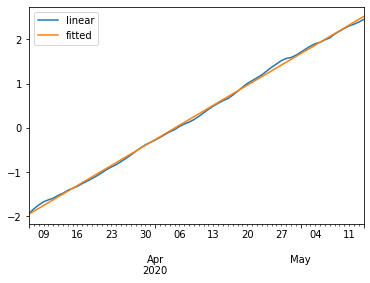

In [21]:
df_pred['fitted'] = np.polyval(fit[0], df_pred['daynum'])
df_pred[['linear', 'fitted']].plot()

Finished fitting, now back to the original data! Once we have the fitted values, we take the double negative exponential to find the estimated cumulative curve. To reduce that to the orignal curve we take the difference between subsequent values with `shift`.

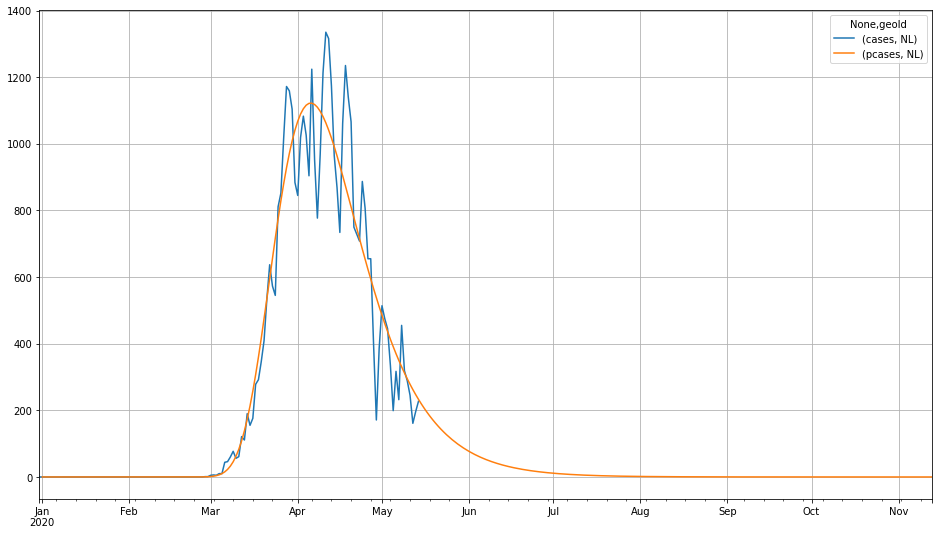

In [22]:
df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * maxcases / progress
df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

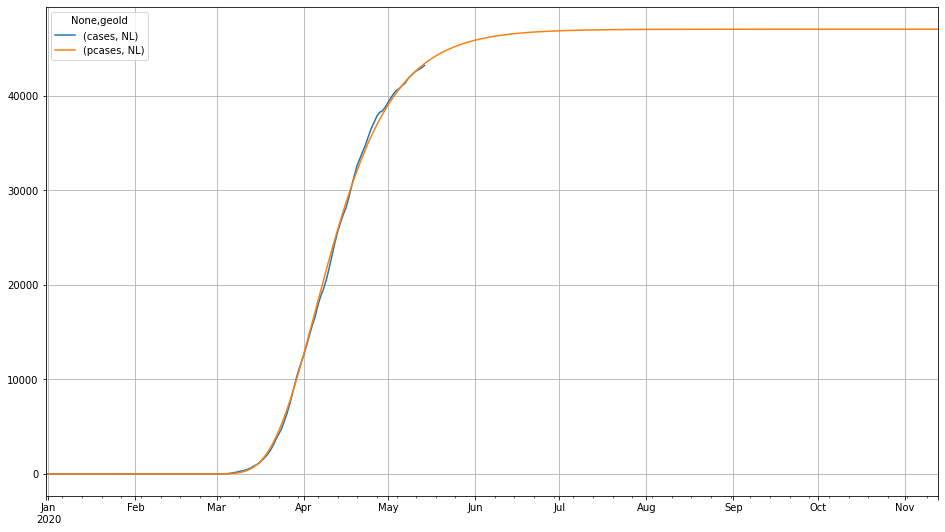

In [23]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

The end value would be the estimated total number.

In [24]:
df_geo[pmeasure][country].cumsum().max()

47045.860805869335

Keep exploring! Stay home, wash your hands, keep your distance.